In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Multilayer Perceptron

- In this project, I was assigned to implement multilayer perceptron (MLP) for three different problems which are:
    - XOR
    - Sine approximation
    - Iris flower classification


- For this purpose, I implemented a generic MLP class which can be used for each problem separately. An MLP object takes two arguments:
    - Number of neurons in each layer
    - Type of activation function


- Layer sizes are given in a list where first element is the size of input layer, last is the size of output layer and the remaining are for hidden layers. You may change the number of neurons in hidden layers and see the change in the model.
- As activation function I determined two functions which are $\textbf{sigmoid}$ and $\textbf{tanh}$.


- MLP class contains the implementation of forward propogation and back propogation. It also includes train and test functions. So, everythihg we need are embedded into this class. You may see the implementation below.

In [11]:
class MLP():
    def __init__(self,layer_sizes,activation_function):
        if activation_function=="sigmoid":
            self.activation = lambda x: 1/(1+np.exp(-x))
            self.activation_derivative = lambda x: x*(1-x)
        
        elif activation_function=="tanh":
            self.activation = lambda x: np.tanh(x)
            self.activation_derivative = lambda x: 1-x**2
        
        self.W = []
        for i in range(len(layer_sizes)-1):
            a,b = layer_sizes[i], layer_sizes[i+1]
            w = np.random.normal(0, 1, a*b).reshape(b,a)
            self.W.append(w)


    def error(self,y_head,y):
        return np.sum(0.5*(y_head-y)**2)
    
    def forward_prop(self,x):
        a = x.copy()
        
        try:
            layer_outputs = [a.reshape((a.shape[0],1))]
        except IndexError:
            layer_outputs = [a]
        
        for w in self.W:
            z = w.dot(a)
            a = self.activation(z)
            a = a.reshape((a.shape[0],1))
            layer_outputs.append(a)

        return layer_outputs

    def back_prop(self,layer_outputs,y_sample):
        i = -1
        deltas = [layer_outputs[i] - y_sample]
        for w in reversed(self.W[1:]):
            i = i-1
            current = layer_outputs[i]
            layer_delta = w.T.dot(deltas[0])*self.activation_derivative(current)
            a,b = layer_delta.shape[0], 1
            layer_delta = layer_delta.reshape((a,b))
            deltas.insert(0, layer_delta)
        
        return deltas

    def train(self,X,y,learning_rate,no_of_epochs):
        ERR = []
        for _ in range(no_of_epochs):
            gradients = [np.zeros(w.shape) for w in self.W]
            total_error = 0
            for idx, x in enumerate(X):
                layer_outputs = self.forward_prop(x)
                
                try:
                    y_current = y[idx].reshape((y[idx].shape[0],1))
                except IndexError:
                    y_current = y[idx].copy()
                
                total_error += float(self.error(layer_outputs[-1],y_current))
                deltas = self.back_prop(layer_outputs,y_current)
                for i in range(len(gradients)):
                    gradients[i] = gradients[i] + deltas[i].dot(layer_outputs[i].T)
                
            ERR.append(total_error)
            for i in range(len(self.W)):
                self.W[i] = self.W[i] - learning_rate*(1/len(X))*gradients[i]
        
        return ERR

    def test(self,X_test):
        y_pred = []
        for x in X_test:
            result = self.forward_prop(x)
            res = result[-1]
            y_pred.append(res[0][0])

        return np.array(y_pred)
    
    def plot_error(self,errors):
        plt.figure()
        plt.plot(np.arange(len(ERR)),ERR)
        plt.xlabel('Epoch')
        plt.ylabel('Total Cost')
        plt.show()

# XOR

- In this problem, 3-layer network is used. You can change the size of hidden layer below.
- You may change learning rate and number of epochs as well.

Real XOR values: [0 1 1 0]
Predicted XOR values: [0.00126805 0.9987266  0.9989927  0.00111944]


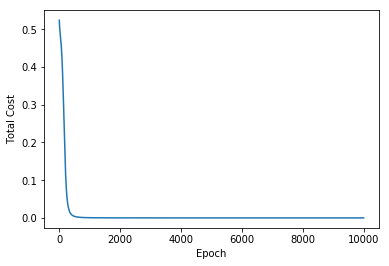

In [12]:
# MLP network to be trained
m_xor = MLP([2,9,1],activation_function="sigmoid")

# Input and output
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

# Training phase: Weights are learned and error per epoch returned
ERR = m_xor.train(X,y,learning_rate=1,no_of_epochs=10000)

# Test phase
y_pred = m_xor.test(X)

np.set_printoptions(suppress=True)
print("Real XOR outputs:", y)
print("Predicted XOR outputs:", y_pred)

# Epoch vs. error plot
m_xor.plot_error(ERR)

# Sine Approximation

- In this problem, 4-layer network is used. You can change the size of hidden layers below.
- You may change learning rate and number of epochs as well.
- These changes may lead to better convergence or vice versa.
- In this problem, I used tanh as activation function since $range(sin) \in [-1,1]$ .
- The trained model is used on never seen test data and real sine function and predicted one are plotted.

In [16]:
from math import pi

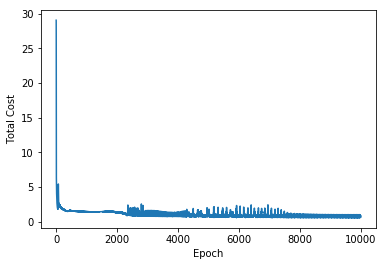

In [17]:
m_sine = MLP([1,10,12,1],activation_function="tanh")

# 40 points sampled from uniform distribution in [0,2π]
X = 2*pi*np.random.random_sample((40,))
X = np.sort(X)
y = np.sin(X)

ERR = m_sine.train(X,y, learning_rate=0.1, no_of_epochs=10000)
m_sine.plot_error(ERR)

set()


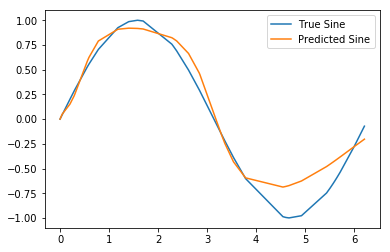

In [24]:
# You can increase sample size for a smoother curve
X_test = 2*pi*np.random.random_sample((40,))
X_test = np.sort(X_test)
y_test = np.sin(X_test)

#print(set(list(X_test)).intersection(set(list(X))))
y_pred_test = m_sine.test(X_test)
plt.figure()
plt.plot(X_test,y_test)
plt.plot(X_test,y_pred_test)
plt.legend(['True Sine', 'Predicted Sine'])
plt.show()

# Iris

- In this problem, 4-layer network is used. You can change the size of hidden layers below.
- You may change learning rate and number of epochs as well.
- The dataset of size 150 is shuffled and 125 of samples are used as training data and 25 as test data.

In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

X = iris['data']
y = iris['target']

# In this part the labels are converted into true 3x1 vector form
temp = np.zeros((len(y),3))
for i in range(temp.shape[0]):
    temp[i][y[i]]=1
    
y = temp

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/6)

# y_test contains class labels instead of vector form
y_test = np.apply_along_axis(lambda k: np.argmax(k), 1, y_test)

m_iris = MLP([4,10,10,3],activation_function="sigmoid")

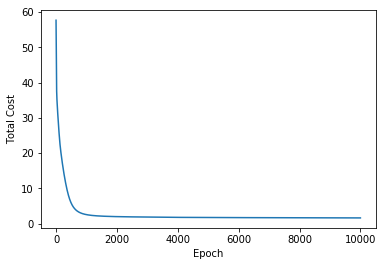

In [26]:
ERR = m_iris.train(X_train,y_train, learning_rate=0.1, no_of_epochs=10000)
m_iris.plot_error(ERR)

In [27]:
# Prediction on never seen test data
y_pred_iris = []
for sample in X_test:
    result = m_iris.forward_prop(sample)
    max_idx = np.argmax(result[-1].T)
    y_pred_iris.append(max_idx)
    
y_pred_iris = np.array(y_pred_iris)

In [29]:
# Accuracy scoring
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred_iris)
print("The accuracy is:", str(acc))

The accuracy is: 0.92
